<a href="https://colab.research.google.com/github/Jhoie/Twitter-Analysis/blob/main/Tweets_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TWITTER ANALYSIS

#### This notebook shows the inital steps in visualization of data from the Twitter account of Dr. Brandeis Marshall

## INTRODUCTION
Twitter is an American microblogging and social networking service on which users post and interact with messages known as 'tweets'. Users' information is stored on their servers and can be retrieved on request based on their privacy policy. If you wish to retrieve your data from Twitter, you can do so using the steps in this article. https://help.twitter.com/en/managing-your-account/accessing-your-twitter-data


## DATA WRANGLING
Users recieve their data from Twitter in a zipped file containing several information. For the purpose of this project, only the file named 'tweet.js' would be used. This Javascript file goes through several processes before it can be used for analysis. The steps followed are mentiond below.



---



## ACTION STEPS
1. Download the twitter.js file to your local computer.
2. Delete the text 'window.YTD.tweet.part0'. This step is necessary because the file contains json elements and the text above prevents the conversion of json elements to a pandas dataframe. 
3. Upload the file to the colab runtime environment
4. Rename the file extension from 'tweet.js' to 'tweet.json'
5. Run the lines of code below. Comments are available in the code to aid understanding.
6. Download the resulting csv file.



In [ ]:
import numpy as np
import pandas as pd
from path import Path
import re
import json
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# download file to colab runtime
# set path to file
p = Path(r"tweet.json")

# read json file
with p.open("r", encoding="utf-8") as f:
    data = json.loads(f.read())

# create dataframe
df = pd.json_normalize(data)
print(df)

# convert to csv file
df.to_csv("tweet_data.csv", index=False, encoding="utf-8")

      tweet.retweeted                                       tweet.source  \
0               False  <a href="http://twitter.com/download/iphone" r...   
1               False  <a href="http://twitter.com/download/iphone" r...   
2               False  <a href="http://twitter.com/download/iphone" r...   
3               False  <a href="https://mobile.twitter.com" rel="nofo...   
4               False  <a href="http://twitter.com" rel="nofollow">Tw...   
...               ...                                                ...   
8969            False  <a href="http://twitter.com/download/iphone" r...   
8970            False  <a href="http://twitter.com/download/iphone" r...   
8971            False  <a href="http://twitter.com/download/iphone" r...   
8972            False  <a href="http://twitter.com/download/iphone" r...   
8973            False  <a href="http://twitter.com/download/iphone" r...   

                                tweet.entities.hashtags  \
0                           

In [ ]:
# read and display the csv file
df = pd.read_csv('/content/tweet_data.csv') #local path from colab
df.head()

,tweet.retweeted,tweet.source,tweet.entities.hashtags,tweet.entities.symbols,tweet.entities.user_mentions,tweet.entities.urls,tweet.display_text_range,tweet.favorite_count,tweet.id_str,tweet.truncated,...,tweet.full_text,tweet.lang,tweet.possibly_sensitive,tweet.in_reply_to_status_id_str,tweet.in_reply_to_user_id,tweet.in_reply_to_status_id,tweet.in_reply_to_screen_name,tweet.in_reply_to_user_id_str,tweet.entities.media,tweet.extended_entities.media
0,False,"<a href=""http://twitter.com/download/iphone"" r...",[],[],"[{'name': 'Paul Carrick Brunson', 'screen_name...",[],"['0', '140']",0,435767431521259521,False,...,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,"<a href=""http://twitter.com/download/iphone"" r...",[],[],"[{'name': '99U', 'screen_name': '99u', 'indice...","[{'url': 'http://t.co/3Q3EDIToZc', 'expanded_u...","['0', '48']",0,435765930258231296,False,...,Start ur day right - @99u http://t.co/3Q3EDIToZc,en,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'computingblerd', 'indices': ['60', ...",[],[],[],"['0', '75']",0,435764109854777345,False,...,What's the diff b/w CS &amp; IT? CS = theory. ...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],[],"[{'name': 'Steven C. George 🇺🇸', 'screen_name'...",[],"['0', '88']",0,435627053916753920,False,...,"@MrStevenGeorge @TheRock Two hands, heart and ...",en,NaN,4.351971e+17,8.401434e+07,4.351971e+17,MrStevenGeorge,8.401434e+07,NaN,NaN
4,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],"[{'name': 'BlerdNation', 'screen_name': 'blerd...",[],"['0', '107']",1,435571086286004226,False,...,@blerdnation @99u No. 3 Don’t Tie Your Happine...,en,NaN,4.355117e+17,1.056328e+09,4.355117e+17,blerdnation,1.056328e+09,NaN,NaN


## DATA RESTRUCTURING
This features (columns) in this dataset were named using based on Twitter's data dictionary. To have a deeper understanding of the features, please read the documentation using this link: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

The purpose of restructuring the dataset is to drop columns that won't be used in this project or to rename columns that are too wordy and confusing.


In [ ]:
# Drop columns that won't be used. These colums are either unique ids or urls to media files
df.drop(['tweet.retweeted', 'tweet.entities.symbols', 'tweet.entities.urls',
         'tweet.display_text_range', 'tweet.id', 'tweet.id_str', 'tweet.truncated',
         'tweet.favorited', 'tweet.lang', 'tweet.possibly_sensitive', 
         'tweet.in_reply_to_user_id', 'tweet.in_reply_to_status_id', 
         'tweet.in_reply_to_screen_name', 'tweet.entities.media', 
         'tweet.extended_entities.media'
         ], axis = 1, inplace=True)
df

,tweet.source,tweet.entities.hashtags,tweet.entities.user_mentions,tweet.favorite_count,tweet.retweet_count,tweet.created_at,tweet.full_text,tweet.in_reply_to_status_id_str,tweet.in_reply_to_user_id_str
0,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Paul Carrick Brunson', 'screen_name...",0,0,Tue Feb 18 13:27:06 +0000 2014,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",NaN,NaN
1,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': '99U', 'screen_name': '99u', 'indice...",0,0,Tue Feb 18 13:21:08 +0000 2014,Start ur day right - @99u http://t.co/3Q3EDIToZc,NaN,NaN
2,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'computingblerd', 'indices': ['60', ...",[],0,0,Tue Feb 18 13:13:54 +0000 2014,What's the diff b/w CS &amp; IT? CS = theory. ...,NaN,NaN
3,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],"[{'name': 'Steven C. George 🇺🇸', 'screen_name'...",0,1,Tue Feb 18 04:09:17 +0000 2014,"@MrStevenGeorge @TheRock Two hands, heart and ...",4.351971e+17,8.401434e+07
4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[{'name': 'BlerdNation', 'screen_name': 'blerd...",1,0,Tue Feb 18 00:26:54 +0000 2014,@blerdnation @99u No. 3 Don’t Tie Your Happine...,4.355117e+17,1.056328e+09
...,...,...,...,...,...,...,...,...,...
8969,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Zolange🇿🇼', 'screen_name': 'EMushaw...",0,0,Mon Aug 31 11:28:37 +0000 2015,@EMushawatu This is a popular fun fact. What e...,6.381848e+17,1.520239e+09
8970,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'blackcomputing', 'indices': ['116',...","[{'name': 'One and only Deja deja', 'screen_na...",0,0,Mon Aug 31 11:27:08 +0000 2015,RT @only_deja: Kaya Thomas mobile app has been...,NaN,NaN
8971,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Cameron Partee', 'screen_name': '_m...",0,0,Sun Aug 30 19:14:59 +0000 2015,RT @_misspartee: @csdoctorsister she co-founde...,NaN,NaN
8972,"<a href=""http://twitter.com/download/iphone"" r...",[],[{'name': 'Jennifer Stirrup - Next: #RDA #AI #...,0,0,Sat Aug 29 23:38:52 +0000 2015,RT @jenstirrup: Top story: Big Data Product Wa...,NaN,NaN


In [ ]:
# Rename columns. Rename columns that are either too wordy or have confusing names
df.rename(columns = {'tweet.source':'source', 
                     'tweet.entities.hashtags':'hashtags',
                     'tweet.entities.user_mentions':'mentions',
                     'tweet.favorite_count':'likes',
                     'tweet.retweet_count':'retweets',
                     'tweet.created_at':'date',
                     'tweet.full_text':'full_text',
                     'tweet.in_reply_to_status_id_str':'retweet_by_user',
                     'tweet.in_reply_to_user_id_str':'quote_tweet'
                     }, inplace = True)
df

,source,hashtags,mentions,likes,retweets,date,full_text,retweet_by_user,quote_tweet
0,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Paul Carrick Brunson', 'screen_name...",0,0,Tue Feb 18 13:27:06 +0000 2014,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",NaN,NaN
1,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': '99U', 'screen_name': '99u', 'indice...",0,0,Tue Feb 18 13:21:08 +0000 2014,Start ur day right - @99u http://t.co/3Q3EDIToZc,NaN,NaN
2,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'computingblerd', 'indices': ['60', ...",[],0,0,Tue Feb 18 13:13:54 +0000 2014,What's the diff b/w CS &amp; IT? CS = theory. ...,NaN,NaN
3,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],"[{'name': 'Steven C. George 🇺🇸', 'screen_name'...",0,1,Tue Feb 18 04:09:17 +0000 2014,"@MrStevenGeorge @TheRock Two hands, heart and ...",4.351971e+17,8.401434e+07
4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[{'name': 'BlerdNation', 'screen_name': 'blerd...",1,0,Tue Feb 18 00:26:54 +0000 2014,@blerdnation @99u No. 3 Don’t Tie Your Happine...,4.355117e+17,1.056328e+09
...,...,...,...,...,...,...,...,...,...
8969,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Zolange🇿🇼', 'screen_name': 'EMushaw...",0,0,Mon Aug 31 11:28:37 +0000 2015,@EMushawatu This is a popular fun fact. What e...,6.381848e+17,1.520239e+09
8970,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'blackcomputing', 'indices': ['116',...","[{'name': 'One and only Deja deja', 'screen_na...",0,0,Mon Aug 31 11:27:08 +0000 2015,RT @only_deja: Kaya Thomas mobile app has been...,NaN,NaN
8971,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Cameron Partee', 'screen_name': '_m...",0,0,Sun Aug 30 19:14:59 +0000 2015,RT @_misspartee: @csdoctorsister she co-founde...,NaN,NaN
8972,"<a href=""http://twitter.com/download/iphone"" r...",[],[{'name': 'Jennifer Stirrup - Next: #RDA #AI #...,0,0,Sat Aug 29 23:38:52 +0000 2015,RT @jenstirrup: Top story: Big Data Product Wa...,NaN,NaN


## NATURAL LANGUAGE PROCESSING (NLP)
#### Tweets generally contain a lot of human-readable text (unstructured data). Before we can analyze such data, it needs to be preprocessed. This is where Natural Language Processing (NLP) comes in. NLP is a field that focuses on making natural human language usable by computer programs. Python is famous for having several libraries to make tasks easier. It's not strange it has an NLP library called Natural Language Toolkit (NLTK). NLTK would be used to preprocess all the tweets before they can be visualized.  


In [ ]:
# view the column that contains tweet text
df['full_text']

0       RT @PaulCBrunson: [NEW POST] "There are 7 days...
1        Start ur day right - @99u http://t.co/3Q3EDIToZc
2       What's the diff b/w CS &amp; IT? CS = theory. ...
3       @MrStevenGeorge @TheRock Two hands, heart and ...
4       @blerdnation @99u No. 3 Don’t Tie Your Happine...
                              ...                        
8969    @EMushawatu This is a popular fun fact. What e...
8970    RT @only_deja: Kaya Thomas mobile app has been...
8971    RT @_misspartee: @csdoctorsister she co-founde...
8972    RT @jenstirrup: Top story: Big Data Product Wa...
8973    @liyah_cherelle : u &amp; @TooTallTray r of li...
Name: full_text, Length: 8974, dtype: object

### The next steps are all geared towards cleaing the data. These steps include:
1. Removing links
2. Eliminating punctuations, special characters, numbers and emojis
3. Delete single and reappearing characters
4. Convert text to lower case
5. Deleting stop words


In [ ]:
# removing links
df['clean_tweet'] = df['full_text'].apply(lambda s: ' '.join(re.sub('(https?)://(www)?.?(\w+).(\w+)/?(\w+)?', ' ', s).split()))
df[['full_text','clean_tweet']].iloc[1]

full_text      Start ur day right - @99u http://t.co/3Q3EDIToZc
clean_tweet                           Start ur day right - @99u
Name: 1, dtype: object

In [ ]:
# (https?)://(www)?.?(\w+).(\w+)/?(\w+)? is the regex pattern to match any link
# the new column 'clean_tweet' shows the removal of links from the dataset

Removing punctuations, special characters, numbers and emojis can be done in two ways.
- The first is to them one after the other using several lines of code and regex patterns.
- The second is to removes characters that ARE NOT a-z OR A-Z.
- The second way is more efficent and requires less lines of code, since we are only interested in text data.  

In [ ]:
# [^a-zA-Z] means all characters that ARE NOT a-z OR A-Z
df['clean_tweet'] = df['clean_tweet'].apply(lambda s: ' '.join(re.sub('[^a-zA-Z]' , ' ', s).split()))

# Comparing the orginal column to the cleaned one
df[['full_text','clean_tweet']]

,full_text,clean_tweet
0,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",RT PaulCBrunson NEW POST There are days in a w...
1,Start ur day right - @99u http://t.co/3Q3EDIToZc,Start ur day right u
2,What's the diff b/w CS &amp; IT? CS = theory. ...,What s the diff b w CS amp IT CS theory IT pra...
3,"@MrStevenGeorge @TheRock Two hands, heart and ...",MrStevenGeorge TheRock Two hands heart and det...
4,@blerdnation @99u No. 3 Don’t Tie Your Happine...,blerdnation u No Don t Tie Your Happiness to E...
...,...,...
8969,@EMushawatu This is a popular fun fact. What e...,EMushawatu This is a popular fun fact What els...
8970,RT @only_deja: Kaya Thomas mobile app has been...,RT only deja Kaya Thomas mobile app has been d...
8971,RT @_misspartee: @csdoctorsister she co-founde...,RT misspartee csdoctorsister she co founded a ...
8972,RT @jenstirrup: Top story: Big Data Product Wa...,RT jenstirrup Top story Big Data Product Watch...


In [ ]:
# delete single letters
df['clean_tweet'] = df['clean_tweet'].apply(lambda s: ' '.join(re.sub('(^| ).( |$)' , ' ', s).split()))
df[['full_text','clean_tweet']]

,full_text,clean_tweet
0,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",RT PaulCBrunson NEW POST There are days in wk ...
1,Start ur day right - @99u http://t.co/3Q3EDIToZc,Start ur day right
2,What's the diff b/w CS &amp; IT? CS = theory. ...,What the diff w CS amp IT CS theory IT practic...
3,"@MrStevenGeorge @TheRock Two hands, heart and ...",MrStevenGeorge TheRock Two hands heart and det...
4,@blerdnation @99u No. 3 Don’t Tie Your Happine...,blerdnation No Don Tie Your Happiness to Exter...
...,...,...
8969,@EMushawatu This is a popular fun fact. What e...,EMushawatu This is popular fun fact What else ...
8970,RT @only_deja: Kaya Thomas mobile app has been...,RT only deja Kaya Thomas mobile app has been d...
8971,RT @_misspartee: @csdoctorsister she co-founde...,RT misspartee csdoctorsister she co founded ST...
8972,RT @jenstirrup: Top story: Big Data Product Wa...,RT jenstirrup Top story Big Data Product Watch...


In [ ]:
# delete the 'RT' characters that keep appearing. 
df['clean_tweet'] = df['clean_tweet'].apply(lambda s: ' '.join(re.sub(r'\bRT\b' , ' ', s).split()))
df[['full_text','clean_tweet']]

,full_text,clean_tweet
0,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",PaulCBrunson NEW POST There are days in wk and...
1,Start ur day right - @99u http://t.co/3Q3EDIToZc,Start ur day right
2,What's the diff b/w CS &amp; IT? CS = theory. ...,What the diff w CS amp IT CS theory IT practic...
3,"@MrStevenGeorge @TheRock Two hands, heart and ...",MrStevenGeorge TheRock Two hands heart and det...
4,@blerdnation @99u No. 3 Don’t Tie Your Happine...,blerdnation No Don Tie Your Happiness to Exter...
...,...,...
8969,@EMushawatu This is a popular fun fact. What e...,EMushawatu This is popular fun fact What else ...
8970,RT @only_deja: Kaya Thomas mobile app has been...,only deja Kaya Thomas mobile app has been down...
8971,RT @_misspartee: @csdoctorsister she co-founde...,misspartee csdoctorsister she co founded STEM ...
8972,RT @jenstirrup: Top story: Big Data Product Wa...,jenstirrup Top story Big Data Product Watch St...


In [ ]:
# convert all text to lowercase
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : x.lower())
df[['full_text','clean_tweet']]

,full_text,clean_tweet
0,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",paulcbrunson new post there are days in wk and...
1,Start ur day right - @99u http://t.co/3Q3EDIToZc,start ur day right
2,What's the diff b/w CS &amp; IT? CS = theory. ...,what the diff w cs amp it cs theory it practic...
3,"@MrStevenGeorge @TheRock Two hands, heart and ...",mrstevengeorge therock two hands heart and det...
4,@blerdnation @99u No. 3 Don’t Tie Your Happine...,blerdnation no don tie your happiness to exter...
...,...,...
8969,@EMushawatu This is a popular fun fact. What e...,emushawatu this is popular fun fact what else ...
8970,RT @only_deja: Kaya Thomas mobile app has been...,only deja kaya thomas mobile app has been down...
8971,RT @_misspartee: @csdoctorsister she co-founde...,misspartee csdoctorsister she co founded stem ...
8972,RT @jenstirrup: Top story: Big Data Product Wa...,jenstirrup top story big data product watch st...


### The next step is to remove stop words. These are words like "you, me, them" etc. These words are frequently occuring in English Language, if not removed they would pccupy the largest space in our visualizations riding us of more valueable information that could have been gotten from the data. 

In [ ]:
# calling english stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("amp") #adding "amp" to the set of stopwords


In [ ]:
# function to remove stop words from the clean_tweet column

def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop_words] 
    noise_free_text = ' '.join(noise_free_words) 
    return noise_free_text

In [ ]:
# using fuction and showing difference

df['clean_tweet'] = df['clean_tweet'].apply(lambda s: rem_en(s))
df[['full_text','clean_tweet']]

,full_text,clean_tweet
0,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",paulcbrunson new post days wk someday living s...
1,Start ur day right - @99u http://t.co/3Q3EDIToZc,start ur day right
2,What's the diff b/w CS &amp; IT? CS = theory. ...,diff w cs cs theory practice computingblerd
3,"@MrStevenGeorge @TheRock Two hands, heart and ...",mrstevengeorge therock two hands heart determi...
4,@blerdnation @99u No. 3 Don’t Tie Your Happine...,blerdnation tie happiness external events true...
...,...,...
8969,@EMushawatu This is a popular fun fact. What e...,emushawatu popular fun fact else know kthomas
8970,RT @only_deja: Kaya Thomas mobile app has been...,deja kaya thomas mobile app downloaded almost ...
8971,RT @_misspartee: @csdoctorsister she co-founde...,misspartee csdoctorsister co founded stem camp...
8972,RT @jenstirrup: Top story: Big Data Product Wa...,jenstirrup top story big data product watch st...


## VISUALIZATION

Whew!!! After the intense data preprocessing the next step is to vizualize the data. This would allow us see the topics or words that are most talked about by the user.  

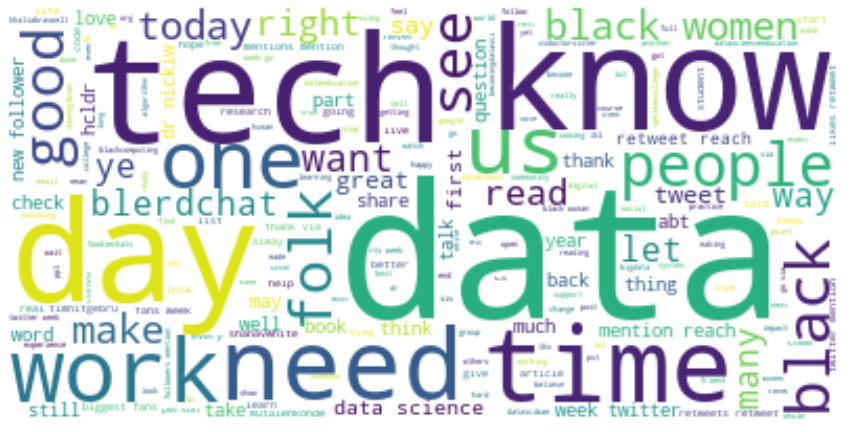

In [ ]:
# creating and showing the word cloud

clean_tweet = ' '.join(i for i in df.clean_tweet)
wordcloud = WordCloud(background_color='white').generate(clean_tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### The following steps would be used to create a more artistic word cloud, feel free to skip this part 

In [ ]:
afro_mask = np.array(Image.open("/content/BWAfro2.jpg"))
afro_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [253, 254, 255],
        [253, 254, 255],
        [253, 254, 255]],

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [253, 254, 255],
        [253, 254, 255],
        [253, 254, 255]],

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [253, 254, 255],
        [253, 254, 255],
        [253, 254, 255]]

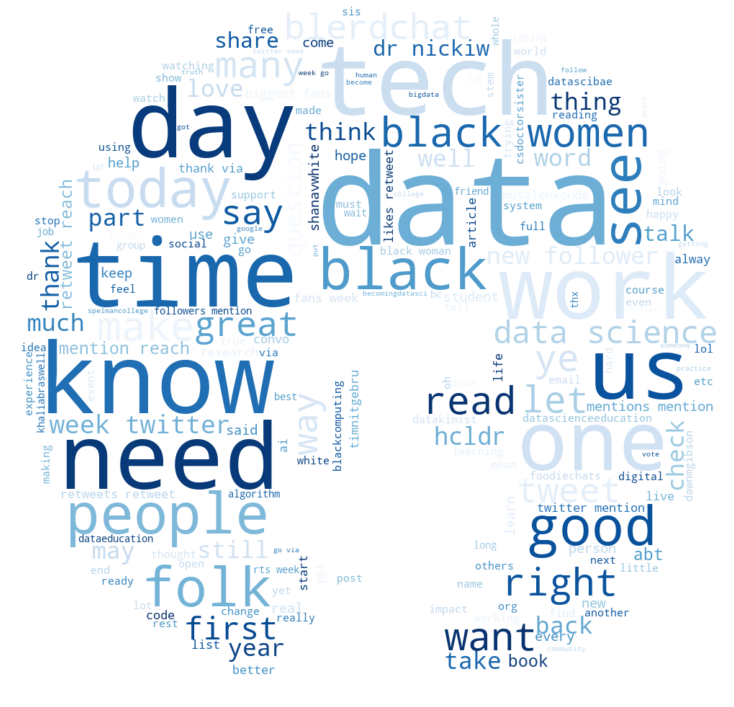

In [ ]:
wordcloud = WordCloud(background_color='white', mask=afro_mask, colormap="Blues").generate(clean_tweet)
plt.figure( figsize=(10,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### When you look closely at the columns; source, hashtag and mentions, you would notice the valuable data in hidden in a myriad of box or angle brackets. The next steps would be to extract the useful information from the columns 

In [ ]:
# extracting device information from angle brackets and links
data_pattern = '.*([>])(.*)([<])'
df['device'] = df['source'].apply(lambda x: re.match(data_pattern, x).group(2))
df[['device', 'source']]

,device,source
0,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."
1,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."
2,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."
3,Twitter Web App,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,Twitter Web Client,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
...,...,...
8969,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."
8970,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."
8971,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."
8972,Twitter for iPhone,"<a href=""http://twitter.com/download/iphone"" r..."


In [ ]:
# extract hashtags from dictionary in a list
pattern = ".*?'text': '(.*?)'"
df['hashtag_list'] = df['hashtags'].str.findall(pattern)
df

,source,hashtags,mentions,likes,retweets,date,full_text,retweet_by_user,quote_tweet,clean_tweet,device,hashtag_list
0,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Paul Carrick Brunson', 'screen_name...",0,0,Tue Feb 18 13:27:06 +0000 2014,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",NaN,NaN,paulcbrunson new post days wk someday living s...,Twitter for iPhone,[]
1,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': '99U', 'screen_name': '99u', 'indice...",0,0,Tue Feb 18 13:21:08 +0000 2014,Start ur day right - @99u http://t.co/3Q3EDIToZc,NaN,NaN,start ur day right,Twitter for iPhone,[]
2,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'computingblerd', 'indices': ['60', ...",[],0,0,Tue Feb 18 13:13:54 +0000 2014,What's the diff b/w CS &amp; IT? CS = theory. ...,NaN,NaN,diff w cs cs theory practice computingblerd,Twitter for iPhone,[computingblerd]
3,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],"[{'name': 'Steven C. George 🇺🇸', 'screen_name'...",0,1,Tue Feb 18 04:09:17 +0000 2014,"@MrStevenGeorge @TheRock Two hands, heart and ...",4.351971e+17,8.401434e+07,mrstevengeorge therock two hands heart determi...,Twitter Web App,[]
4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[{'name': 'BlerdNation', 'screen_name': 'blerd...",1,0,Tue Feb 18 00:26:54 +0000 2014,@blerdnation @99u No. 3 Don’t Tie Your Happine...,4.355117e+17,1.056328e+09,blerdnation tie happiness external events true...,Twitter Web Client,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
8969,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Zolange🇿🇼', 'screen_name': 'EMushaw...",0,0,Mon Aug 31 11:28:37 +0000 2015,@EMushawatu This is a popular fun fact. What e...,6.381848e+17,1.520239e+09,emushawatu popular fun fact else know kthomas,Twitter for iPhone,[]
8970,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'blackcomputing', 'indices': ['116',...","[{'name': 'One and only Deja deja', 'screen_na...",0,0,Mon Aug 31 11:27:08 +0000 2015,RT @only_deja: Kaya Thomas mobile app has been...,NaN,NaN,deja kaya thomas mobile app downloaded almost ...,Twitter for iPhone,[blackcomputing]
8971,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Cameron Partee', 'screen_name': '_m...",0,0,Sun Aug 30 19:14:59 +0000 2015,RT @_misspartee: @csdoctorsister she co-founde...,NaN,NaN,misspartee csdoctorsister co founded stem camp...,Twitter for iPhone,[]
8972,"<a href=""http://twitter.com/download/iphone"" r...",[],[{'name': 'Jennifer Stirrup - Next: #RDA #AI #...,0,0,Sat Aug 29 23:38:52 +0000 2015,RT @jenstirrup: Top story: Big Data Product Wa...,NaN,NaN,jenstirrup top story big data product watch st...,Twitter for iPhone,[]


In [ ]:
hashtags = df['hashtag_list'].explode().value_counts().rename_axis('hashtags').reset_index(name='count')
hashtags

#### The same steps taken with the hashtags column would be repeated for the mentions column



In [ ]:
pattern = ".*?'screen_name': '(.*?)'"
df['mentions_list'] = df['mentions'].str.findall(pattern)
df

,source,hashtags,mentions,likes,retweets,date,full_text,retweet_by_user,quote_tweet,clean_tweet,device,hashtag_list,mentions_list
0,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Paul Carrick Brunson', 'screen_name...",0,0,Tue Feb 18 13:27:06 +0000 2014,"RT @PaulCBrunson: [NEW POST] ""There are 7 days...",NaN,NaN,paulcbrunson new post days wk someday living s...,Twitter for iPhone,,[PaulCBrunson]
1,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': '99U', 'screen_name': '99u', 'indice...",0,0,Tue Feb 18 13:21:08 +0000 2014,Start ur day right - @99u http://t.co/3Q3EDIToZc,NaN,NaN,start ur day right,Twitter for iPhone,,[99u]
2,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'computingblerd', 'indices': ['60', ...",[],0,0,Tue Feb 18 13:13:54 +0000 2014,What's the diff b/w CS &amp; IT? CS = theory. ...,NaN,NaN,diff w cs cs theory practice computingblerd,Twitter for iPhone,computingblerd,[]
3,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],"[{'name': 'Steven C. George 🇺🇸', 'screen_name'...",0,1,Tue Feb 18 04:09:17 +0000 2014,"@MrStevenGeorge @TheRock Two hands, heart and ...",4.351971e+17,8.401434e+07,mrstevengeorge therock two hands heart determi...,Twitter Web App,,"[MrStevenGeorge, TheRock]"
4,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[{'name': 'BlerdNation', 'screen_name': 'blerd...",1,0,Tue Feb 18 00:26:54 +0000 2014,@blerdnation @99u No. 3 Don’t Tie Your Happine...,4.355117e+17,1.056328e+09,blerdnation tie happiness external events true...,Twitter Web Client,,"[blerdnation, 99u, 99]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Zolange🇿🇼', 'screen_name': 'EMushaw...",0,0,Mon Aug 31 11:28:37 +0000 2015,@EMushawatu This is a popular fun fact. What e...,6.381848e+17,1.520239e+09,emushawatu popular fun fact else know kthomas,Twitter for iPhone,,"[EMushawatu, kthomas901]"
8970,"<a href=""http://twitter.com/download/iphone"" r...","[{'text': 'blackcomputing', 'indices': ['116',...","[{'name': 'One and only Deja deja', 'screen_na...",0,0,Mon Aug 31 11:27:08 +0000 2015,RT @only_deja: Kaya Thomas mobile app has been...,NaN,NaN,deja kaya thomas mobile app downloaded almost ...,Twitter for iPhone,blackcomputing,"[only_deja, csdoctorsister]"
8971,"<a href=""http://twitter.com/download/iphone"" r...",[],"[{'name': 'Cameron Partee', 'screen_name': '_m...",0,0,Sun Aug 30 19:14:59 +0000 2015,RT @_misspartee: @csdoctorsister she co-founde...,NaN,NaN,misspartee csdoctorsister co founded stem camp...,Twitter for iPhone,,"[_misspartee, csdoctorsister]"
8972,"<a href=""http://twitter.com/download/iphone"" r...",[],[{'name': 'Jennifer Stirrup - Next: #RDA #AI #...,0,0,Sat Aug 29 23:38:52 +0000 2015,RT @jenstirrup: Top story: Big Data Product Wa...,NaN,NaN,jenstirrup top story big data product watch st...,Twitter for iPhone,,[jenstirrup]


In [ ]:
mentions = df['mentions_list'].explode().value_counts().rename_axis('mentions').reset_index(name='count')
mentions

,mentions,count
0,dr_nickiw,130
1,csdoctorsister,125
2,timnitGebru,125
3,ShanaVWhite,119
4,mutalenkonde,118
...,...,...
2979,hollingk,1
2980,kaliouby,1
2981,catherinebuk,1
2982,megandfigueroa,1


In [ ]:
# saving the dataframe in a csv file
hashtags.to_csv('hashtags_data.csv', index=False, encoding='utf-8')

In [ ]:
# saving the dataframe in a csv file
mentions.to_csv('mentions_data.csv', index=False, encoding='utf-8')

In [ ]:
# saving the cleaned dataset
df.to_csv('cleaned_tweet_data.csv', index=False, encoding='utf-8')